# Olivine Segmentation and Analysis using API

In [10]:
import sys
import glob
sys.path.append('../mimlem/')

## BCF File to Tiff Converison

In [13]:
import  bcf2tiff

In [11]:
!ls test_data/bcf/
!ls -l test_data/bcf/ | grep bcf | wc -l

'Mapping_(1,1).bcf'  'Mapping_(2,1).bcf'  'Mapping_(3,1).bcf'
'Mapping_(1,2).bcf'  'Mapping_(2,2).bcf'  'Mapping_(3,2).bcf'
'Mapping_(1,3).bcf'  'Mapping_(2,3).bcf'  'Mapping_(3,3).bcf'
'Mapping_(1,4).bcf'  'Mapping_(2,4).bcf'  'Mapping_(3,4).bcf'
'Mapping_(1,5).bcf'  'Mapping_(2,5).bcf'  'Mapping_(3,5).bcf'
'Mapping_(1,6).bcf'  'Mapping_(2,6).bcf'  'Mapping_(3,6).bcf'
18


In [14]:
bcf2tiff.bcf2tiff('/path/to/bcf/file.bcf', '/output/path')

Load file: /path/to/bcf/files


ValueError: No filename matches the pattern "/path/to/bcf/files"

In [15]:
files = glob.glob('test_data/bcf/*.bcf')

In [16]:
for file in files:
    bcf2tiff.bcf2tiff(file, 'test_data/tiff')

Load file: test_data/bcf/Mapping_(1,6).bcf
Write file: test_data/tiff/Mapping_(1,6)_Al.TIFF float64
Write file: test_data/tiff/Mapping_(1,6)_Ca.TIFF float64
Write file: test_data/tiff/Mapping_(1,6)_Fe.TIFF float64
Write file: test_data/tiff/Mapping_(1,6)_Mg.TIFF float64
Write file: test_data/tiff/Mapping_(1,6)_Na.TIFF float64
Write file: test_data/tiff/Mapping_(1,6)_Si.TIFF float64
Load file: test_data/bcf/Mapping_(3,3).bcf
Write file: test_data/tiff/Mapping_(3,3)_Al.TIFF float64
Write file: test_data/tiff/Mapping_(3,3)_Ca.TIFF float64
Write file: test_data/tiff/Mapping_(3,3)_Fe.TIFF float64
Write file: test_data/tiff/Mapping_(3,3)_Mg.TIFF float64
Write file: test_data/tiff/Mapping_(3,3)_Na.TIFF float64
Write file: test_data/tiff/Mapping_(3,3)_Si.TIFF float64
Load file: test_data/bcf/Mapping_(3,5).bcf
Write file: test_data/tiff/Mapping_(3,5)_Al.TIFF float64
Write file: test_data/tiff/Mapping_(3,5)_Ca.TIFF float64
Write file: test_data/tiff/Mapping_(3,5)_Fe.TIFF float64
Write file: test

## Stitch the Tiles

In [17]:
import simple_stitching

In [18]:
simple_stitching.stitch_auto('test_data/tiff') # output in to the same folder `stitched`

stitch
dx, dy:  0.9166731852   0.89988991
Calc ofx
Calc ofy
Estimated offset x, y:  1 0


'test_data/tiff/stitched'

## Semantic Segmentation

In [19]:
import segment

/usr/local/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DeepLabV3_ResNet101_Weights.COCO_WITH_VOC_LABELS_V1`. You can also use `weights=DeepLabV3_ResNet101_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Device: cpu
Image to large (2293, 1536) splitting 


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

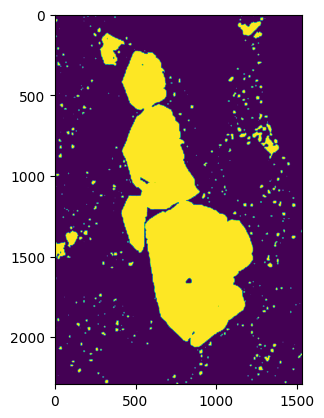

In [20]:
segment.bse('test_data/tiff/stitched/stitched_CH0.TIFF', 'test_data/tiff/stitched')

## Analyze Segmentation

In [21]:
import section_analysis

In [23]:
section_analysis.analyze('test_data/tiff/stitched')

'test_data/tiff/stitched/analyzed'